In [1]:
import pandas as pd   
import numpy as np  
import re
import matplotlib.pyplot as plt  
from math import*
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [2]:
FILENAME_TENNIS = "atp_tennis.csv"
matches = pd.read_csv(FILENAME_TENNIS)
display(matches.head(5))

#code from https://www.kaggle.com/code/sabahao/my-tennis-randomforest


matches["date"] = pd.to_datetime(matches["Date"])

# Create a new column representing the Indoor or Outdoor value
matches["courtType"] = matches["Court"].astype("category").cat.codes

# Create a new column representing the kind of surface
matches["groundType"] = matches["Surface"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["opponentCode"] = matches["Player_2"].astype("category").cat.codes

# Create a new column representing a code for each opponent
matches["playerCode"] = matches["Player_1"].astype("category").cat.codes


# Create a new column representing if the player1 won the game with a 1 or if it didn't with a 0
matches["target"] = (matches["Winner"] == matches["Player_1"]).astype("int")

display(matches.head(5))



,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Pts_2,Odd_1,Odd_2,Score,date,courtType,groundType,opponentCode,playerCode,target
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,...,-1,-1.0,-1.0,6-4 6-2,2000-01-03,1,3,746,317,1
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,...,-1,-1.0,-1.0,3-6 3-6,2000-01-03,1,3,355,229,0
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,...,-1,-1.0,-1.0,6-7 7-5 6-3,2000-01-03,1,3,62,356,1
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,...,-1,-1.0,-1.0,1-6 4-6,2000-01-03,1,3,377,646,0
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,...,-1,-1.0,-1.0,7-6 5-7 6-4,2000-01-03,1,3,1395,403,1


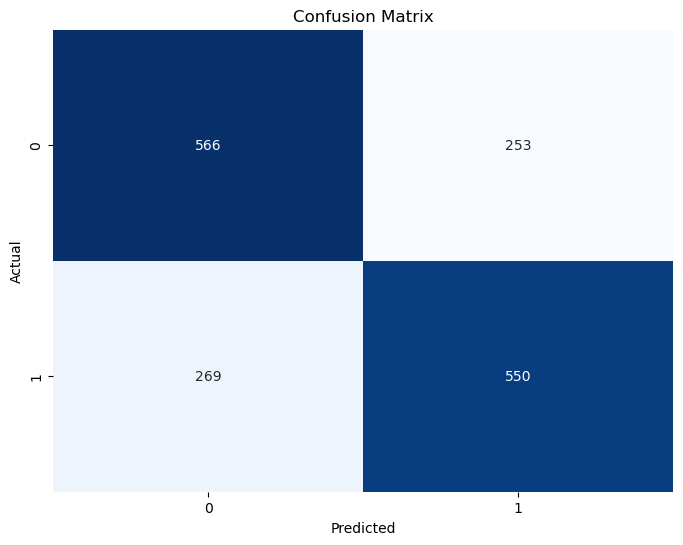

In [3]:
# Training the machine learning model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 3, random_state = 1)

# Divide the dataset into train and test sections
conditionDate = matches['date'] > '2005-01-01'
conditionDate2 = matches['date'] < '2023-10-29'
combinedCondition = conditionDate & conditionDate2 
train = matches[combinedCondition]

test = matches[matches["date"] > '2023-10-29']

# A list of all the prdictors 
predictors = ["playerCode", "opponentCode", "Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2"]

# Fit the random forest model, fitting the predictors and trying to predict the target
rf.fit(train[predictors], train["target"])

prediction = rf.predict(test[predictors])

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['target'], prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [4]:
probabilities = rf.predict_proba(test[predictors])

firstPlayer = "Nadal R."
firstOpponent = "Paire B."

rows = matches.loc[matches["Player_1"] == firstPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", firstPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == firstOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", firstOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

# Change the Player and opponent 
print(" ")
print("CHANGE OF PLAYERS")
print(" ")

secondPlayer = firstOpponent
secondOpponent = firstPlayer
    
rows = matches.loc[matches["Player_1"] == secondPlayer, "playerCode"]
if not rows.empty:
    print("ID for PLAYER:", secondPlayer)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

rows = matches.loc[matches["Player_2"] == secondOpponent, "opponentCode"]
if not rows.empty:
    print("ID for OPPONENT:", secondOpponent)
    print(rows.iloc[0])
else:
    print("Player not found in the dataset.")

ID for PLAYER: Nadal R.
912
ID for OPPONENT: Paire B.
972
 
CHANGE OF PLAYERS
 
ID for PLAYER: Paire B.
975
ID for OPPONENT: Nadal R.
906


In [7]:
# First Data
firstPlayerCode = 892
firstOpponentCode = 954
firstPlayerRank = 49
firstPlayerPoints = 970
firstPlayerOdds = 1.30

# Second Data
secondPlayerCode = 959
secondOpponentCode = 885
secondPlayerRank = 112
secondPlayerPoints = 551
secondPlayerOdds = 2.60

firstData = {
    "playerCode": firstPlayerCode,
    "opponentCode": firstOpponentCode,
    "Rank_1": firstPlayerRank, 
    "Rank_2": secondPlayerRank, 
    "Pts_1": firstPlayerPoints, 
    "Pts_2": secondPlayerPoints, 
    "Odd_1": firstPlayerOdds, 
    "Odd_2": secondPlayerOdds
}

secondData = {
    "playerCode": secondPlayerCode,
    "opponentCode": secondOpponentCode,
    "Rank_1": secondPlayerRank, 
    "Rank_2": firstPlayerRank, 
    "Pts_1": secondPlayerPoints, 
    "Pts_2": firstPlayerPoints, 
    "Odd_1": secondPlayerOdds, 
    "Odd_2": firstPlayerOdds
}


# Convert firstData to a DataFrame with a single row
firstData_df = pd.DataFrame([firstData])
secondData_df = pd.DataFrame([secondData])

# Extract predictors in the same order as used during training
firstDataInput = firstData_df[predictors]
secondDataInput = secondData_df[predictors]

# Make predictions
prediction = rf.predict(firstDataInput)


# Make a prediction on the new data
print(f"{firstPlayer} win result is: {prediction[0]}")
prediction = rf.predict(secondDataInput)
print(f"{secondPlayer} win result is: {prediction[0]}")

Nadal R. win result is: 1
Paire B. win result is: 0
